Good Morining Sir/Madam

My Name is Bhargavi. Today I am going to present about my capstone project regarding Covid_19 Predictions. I have made this project based on EDA and Machine learning, In this project I have performed the certain task they are Data Collection, Data Preprocessing, Feature Engineering, Model Selection, Model Training and evaluation, Interpretation and visualization. Overall, a capstone project on COVID-19 predictions using machine learning could be a valuable contribution to the field of public health.

# **Covid_19 - Predictions Based on Machine Learning**

# **Introduction**

COVID-19 started in the Chinese province of 
Hubei's Wuhan in December 2019. Since then, several waves 
of covid-19 have hit people all around the world. As the whole 
world was striving to combat the coronavirus disease 
(COVID-19), healthcare and health monitoring systems were 
struggling to confront the virus. Many cases had been 
observed where COVID-19 could not be identified at a 
specific time. Furthermore, any effective strategy that could 
monitor the coronavirus state in the human body had not 
been established. As a result, patients with the coronavirus 
could not receive proper treatment when necessary. 
Therefore, the death toll due to COVID-19 was rising. 
Although the situation of covid-19 has subsided currently, 
precautions need to be taken in advance to keep further waves 
at bay. This paperwork proposes a systematic approach to 
combat the COVID-19 pandemic more efficiently by using 
various machine learning algorithms and comparing their 
accuracy and using the best outcome to predict the disease. 
With four binary features, the model was able to predict the 
COVID-19 test outcomes with high accuracy. This paper 
suggests a practical solution with the help of the developed 
health monitoring system that can mitigate the loss done by 
COVID-19. When testing resources are few, this framework 
can be used, among other things, to prioritize testing for
COVID-19.

We have performed a comparative analysis on the four 
models trained and chosen the best one giving the results 
with high accuracy. Thus, selected model can be 
implemented at a good scale for effective screening and 
prioritization of testing for the virus in the general 
population.




A capstone project for machine learning-based COVID-19 diagnosis based on symptoms could involve developing a model that can accurately predict whether an individual has COVID-19 based on their reported symptoms. Here are some steps we could take to develop such a project:


1.  Collect data: We will need a dataset that includes information on COVID-19 patients, such as their symptoms, test results, and other relevant medical information.
2.   Preprocess the data: Preprocessing involves cleaning and transforming the data to ensure that it is suitable for machine learning algorithms. This may involve handling missing data, scaling numerical features, and encoding categorical variables.
3.   Feature selection: This step involves identifying the most relevant features that are most predictive of COVID-19 infection. We could use techniques such as correlation analysis, principal component analysis, or feature importance from tree-based models to select the features.
4.   Model selection and evaluation: We can use various machine learning algorithms such as logistic regression, decision trees, random forests, or neural networks to develop the prediction model. The model's performance should be evaluated using appropriate metrics such as accuracy, precision, recall, and F1 score. We can use cross-validation techniques to ensure that the model is not overfitting the training data.

5.   Deployment: Finally, we can deploy the model as a web application, API or integrate it into existing healthcare systems to aid healthcare professionals in diagnosis.














### Aim: 
- Performing necessary feature engineering step to clean and modify the data. 
- Identifying important features that may play important role to predict Covid-19 price.
- machine learning based prediction of covid-19 diagnosis based on symptoms

Importing necessary libraries

In [ ]:
! pip install scikit-learn
! pip install sklearn
! pip install matplotlib-venn
! pip install cartopy
import cartopy
! pip install category_encoders
! pip install fancyimpute

In [ ]:
# Importing libraries
import missingno as msno # library to examine missing values
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import category_encoders as ce
from scipy import stats
from matplotlib.pyplot import figure
import plotly.express as px


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


# importing cost function libraries
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
### To ignore warnings
import warnings 
warnings.filterwarnings('ignore')

### Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, fbeta_score

import pandas as pd 
import numpy as np

### Visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings("ignore") # ignoring wranings
# it is imporat when we are done with project otherwise do not call this and try to understand the warnings.

# Reading the Dataset

In [ ]:
Covid_19 = pd.read_csv("/content/corona_tested_006.csv", dtype='unicode')

### Basic exploration of the data

In [ ]:
Covid_19

Ind_ID   Test_date Cough_symptoms  Fever Sore_throat  \
0            1  11-03-2020           TRUE  FALSE        TRUE   
1            2  11-03-2020          FALSE   TRUE       FALSE   
2            3  11-03-2020          FALSE   TRUE       FALSE   
3            4  11-03-2020           TRUE  FALSE       FALSE   
4            5  11-03-2020           TRUE  FALSE       FALSE   
...        ...         ...            ...    ...         ...   
278843  278844  30-04-2020          FALSE  FALSE       FALSE   
278844  278845  30-04-2020          FALSE  FALSE       FALSE   
278845  278846  30-04-2020          FALSE  FALSE       FALSE   
278846  278847  30-04-2020          FALSE  FALSE       FALSE   
278847  278848  30-04-2020          FALSE  FALSE       FALSE   

       Shortness_of_breath Headache    Corona Age_60_above     Sex  \
0                    FALSE    FALSE  negative         None    None   
1                    FALSE    FALSE  positive         None    None   
2                    FALSE    FALSE  positive         None    None   
3                    FALSE    FALSE  negative         None    None   
4                    FALSE    FALSE  negative         None    None   
...                    ...      ...       ...          ...     ...   
278843               FALSE    FALSE  positive         None    male   
278844               FALSE    FALSE  negative         None  female   
278845               FALSE    FALSE  negative         None    male   
278846               FALSE    FALSE  negative         None    male   
278847               FALSE    FALSE  negative         None  female   

                 Known_contact  
0                       Abroad  
1                       Abroad  
2                       Abroad  
3                       Abroad  
4       Contact with confirmed  
...                        ...  
278843                   Other  
278844                   Other  
278845                   Other  
278846                   Other  
278847                   Other  

[278848 rows x 11 columns]

In [ ]:
Covid_19.skew() # to examine skewness

Ind_ID    0.0
dtype: float64

In [ ]:
Covid_19.shape  # Rechecking the number of observations and variables in the dataset

(278848, 11)

In [ ]:
Covid_19.columns

Index(['Ind_ID', 'Test_date', 'Cough_symptoms', 'Fever', 'Sore_throat',
       'Shortness_of_breath', 'Headache', 'Corona', 'Age_60_above', 'Sex',
       'Known_contact'],
      dtype='object')

In [ ]:
Covid_19.dtypes # checking the datatype

Ind_ID                 object
Test_date              object
Cough_symptoms         object
Fever                  object
Sore_throat            object
Shortness_of_breath    object
Headache               object
Corona                 object
Age_60_above           object
Sex                    object
Known_contact          object
dtype: object

In [ ]:
Covid_19.nunique() # checking unique values

Ind_ID                 278848
Test_date                  51
Cough_symptoms              3
Fever                       3
Sore_throat                 3
Shortness_of_breath         3
Headache                    3
Corona                      3
Age_60_above                3
Sex                         3
Known_contact               3
dtype: int64

In [ ]:
Covid_19.drop_duplicates() # droping duplicates

Ind_ID   Test_date Cough_symptoms  Fever Sore_throat  \
0            1  11-03-2020           TRUE  FALSE        TRUE   
1            2  11-03-2020          FALSE   TRUE       FALSE   
2            3  11-03-2020          FALSE   TRUE       FALSE   
3            4  11-03-2020           TRUE  FALSE       FALSE   
4            5  11-03-2020           TRUE  FALSE       FALSE   
...        ...         ...            ...    ...         ...   
278843  278844  30-04-2020          FALSE  FALSE       FALSE   
278844  278845  30-04-2020          FALSE  FALSE       FALSE   
278845  278846  30-04-2020          FALSE  FALSE       FALSE   
278846  278847  30-04-2020          FALSE  FALSE       FALSE   
278847  278848  30-04-2020          FALSE  FALSE       FALSE   

       Shortness_of_breath Headache    Corona Age_60_above     Sex  \
0                    FALSE    FALSE  negative         None    None   
1                    FALSE    FALSE  positive         None    None   
2                    FALSE    FALSE  positive         None    None   
3                    FALSE    FALSE  negative         None    None   
4                    FALSE    FALSE  negative         None    None   
...                    ...      ...       ...          ...     ...   
278843               FALSE    FALSE  positive         None    male   
278844               FALSE    FALSE  negative         None  female   
278845               FALSE    FALSE  negative         None    male   
278846               FALSE    FALSE  negative         None    male   
278847               FALSE    FALSE  negative         None  female   

                 Known_contact  
0                       Abroad  
1                       Abroad  
2                       Abroad  
3                       Abroad  
4       Contact with confirmed  
...                        ...  
278843                   Other  
278844                   Other  
278845                   Other  
278846                   Other  
278847                   Other  

[278848 rows x 11 columns]

# Feature engineering techniques for Machine Learning

# Dealing with missing values

In [ ]:
# Replacing . with NaN
Covid_19 = Covid_19.replace('\.+', np.nan, regex=True)


In [ ]:
# Replacing None with NaN
Covid_19 = Covid_19.replace('None', np.nan, regex=True)
Covid_19

Ind_ID   Test_date Cough_symptoms  Fever Sore_throat  \
0            1  11-03-2020           TRUE  FALSE        TRUE   
1            2  11-03-2020          FALSE   TRUE       FALSE   
2            3  11-03-2020          FALSE   TRUE       FALSE   
3            4  11-03-2020           TRUE  FALSE       FALSE   
4            5  11-03-2020           TRUE  FALSE       FALSE   
...        ...         ...            ...    ...         ...   
278843  278844  30-04-2020          FALSE  FALSE       FALSE   
278844  278845  30-04-2020          FALSE  FALSE       FALSE   
278845  278846  30-04-2020          FALSE  FALSE       FALSE   
278846  278847  30-04-2020          FALSE  FALSE       FALSE   
278847  278848  30-04-2020          FALSE  FALSE       FALSE   

       Shortness_of_breath Headache    Corona Age_60_above     Sex  \
0                    FALSE    FALSE  negative          NaN     NaN   
1                    FALSE    FALSE  positive          NaN     NaN   
2                    FALSE    FALSE  positive          NaN     NaN   
3                    FALSE    FALSE  negative          NaN     NaN   
4                    FALSE    FALSE  negative          NaN     NaN   
...                    ...      ...       ...          ...     ...   
278843               FALSE    FALSE  positive          NaN    male   
278844               FALSE    FALSE  negative          NaN  female   
278845               FALSE    FALSE  negative          NaN    male   
278846               FALSE    FALSE  negative          NaN    male   
278847               FALSE    FALSE  negative          NaN  female   

                 Known_contact  
0                       Abroad  
1                       Abroad  
2                       Abroad  
3                       Abroad  
4       Contact with confirmed  
...                        ...  
278843                   Other  
278844                   Other  
278845                   Other  
278846                   Other  
278847                   Other  

[278848 rows x 11 columns]

In [ ]:
Covid_19.info() # checking info again

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  object
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278596 non-null  object
 3   Fever                278596 non-null  object
 4   Sore_throat          278847 non-null  object
 5   Shortness_of_breath  278847 non-null  object
 6   Headache             278847 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         151528 non-null  object
 9   Sex                  259285 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: object(11)
memory usage: 23.4+ MB


In [ ]:
Covid_19_missing = Covid_19.isnull() # checking null values again
Covid_19_missing

Ind_ID  Test_date  Cough_symptoms  Fever  Sore_throat  \
0        False      False           False  False        False   
1        False      False           False  False        False   
2        False      False           False  False        False   
3        False      False           False  False        False   
4        False      False           False  False        False   
...        ...        ...             ...    ...          ...   
278843   False      False           False  False        False   
278844   False      False           False  False        False   
278845   False      False           False  False        False   
278846   False      False           False  False        False   
278847   False      False           False  False        False   

        Shortness_of_breath  Headache  Corona  Age_60_above    Sex  \
0                     False     False   False          True   True   
1                     False     False   False          True   True   
2                     False     False   False          True   True   
3                     False     False   False          True   True   
4                     False     False   False          True   True   
...                     ...       ...     ...           ...    ...   
278843                False     False   False          True  False   
278844                False     False   False          True  False   
278845                False     False   False          True  False   
278846                False     False   False          True  False   
278847                False     False   False          True  False   

        Known_contact  
0               False  
1               False  
2               False  
3               False  
4               False  
...               ...  
278843          False  
278844          False  
278845          False  
278846          False  
278847          False  

[278848 rows x 11 columns]

<Axes: >

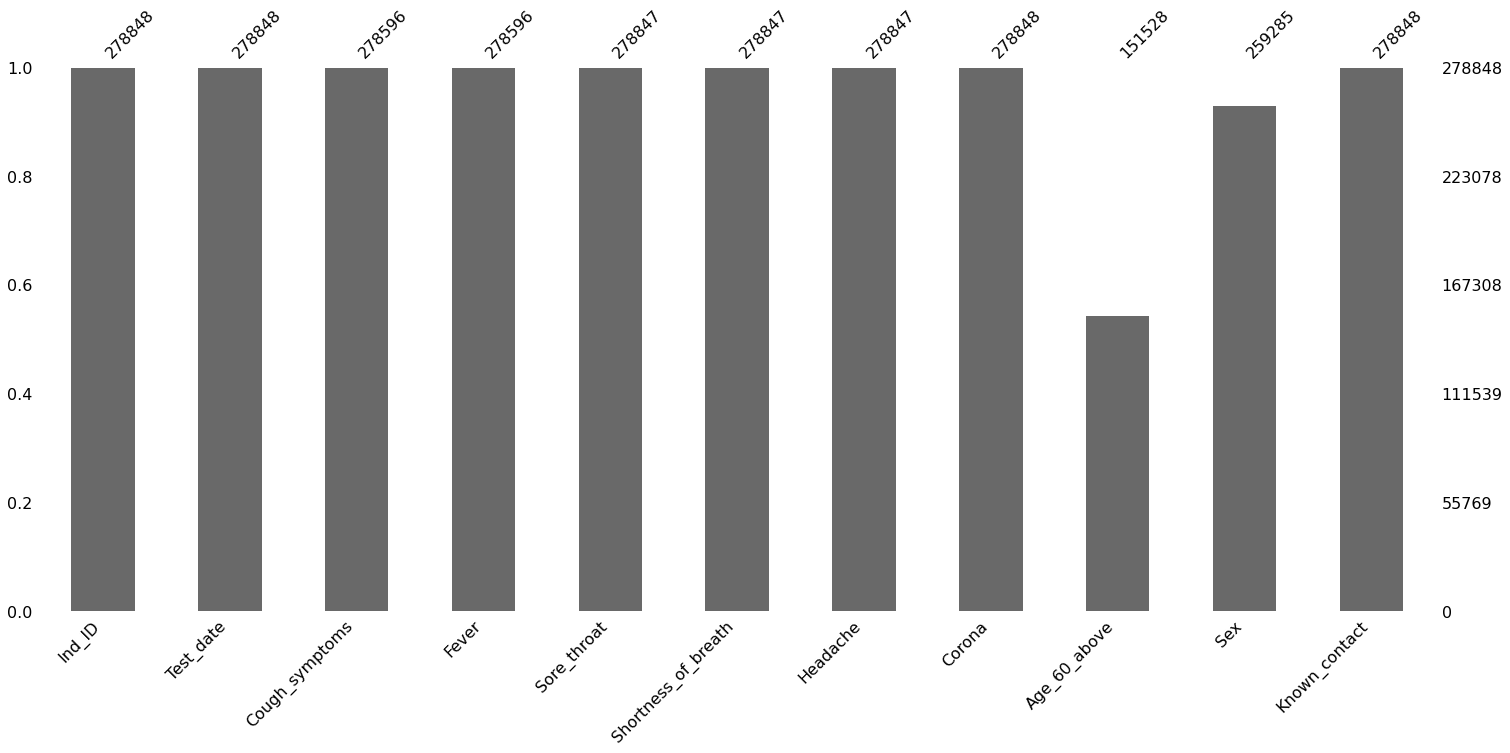

In [ ]:
# creating bar plot to see the missing values
msno.bar(Covid_19)

<Axes: >

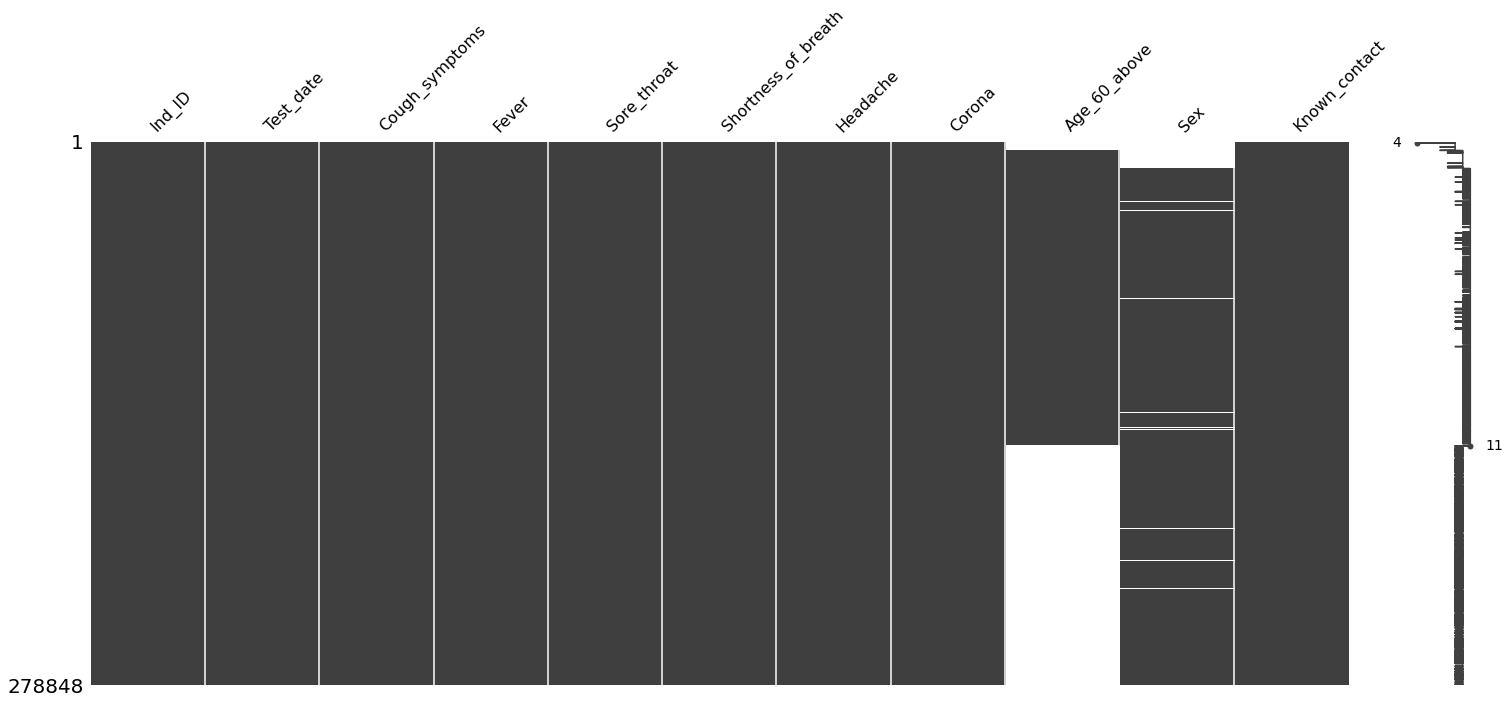

In [ ]:
# creating matrix plot to see the pattern in missing values 
msno.matrix(Covid_19)



*   Apart from Age_60_above, Sex columns, rest other columns have less missing values.
*   Either we can remove them or replace with something like mean or median or mode too.
*   Because it is categorical data either we can use mode or we can use imputations like simple imputer or Knn imputer or MICE imputation
*   There are 252 missing values in cough_symptoms and fever and 19563 missing values in sex column and 127320 missing values in age_60_above column












In [ ]:
Covid_19.head()

Ind_ID   Test_date Cough_symptoms  Fever Sore_throat Shortness_of_breath  \
0      1  11-03-2020           TRUE  FALSE        TRUE               FALSE   
1      2  11-03-2020          FALSE   TRUE       FALSE               FALSE   
2      3  11-03-2020          FALSE   TRUE       FALSE               FALSE   
3      4  11-03-2020           TRUE  FALSE       FALSE               FALSE   
4      5  11-03-2020           TRUE  FALSE       FALSE               FALSE   

  Headache    Corona Age_60_above  Sex           Known_contact  
0    FALSE  negative          NaN  NaN                  Abroad  
1    FALSE  positive          NaN  NaN                  Abroad  
2    FALSE  positive          NaN  NaN                  Abroad  
3    FALSE  negative          NaN  NaN                  Abroad  
4    FALSE  negative          NaN  NaN  Contact with confirmed

In [ ]:
Covid_19.tail()

Ind_ID   Test_date Cough_symptoms  Fever Sore_throat  \
278843  278844  30-04-2020          FALSE  FALSE       FALSE   
278844  278845  30-04-2020          FALSE  FALSE       FALSE   
278845  278846  30-04-2020          FALSE  FALSE       FALSE   
278846  278847  30-04-2020          FALSE  FALSE       FALSE   
278847  278848  30-04-2020          FALSE  FALSE       FALSE   

       Shortness_of_breath Headache    Corona Age_60_above     Sex  \
278843               FALSE    FALSE  positive          NaN    male   
278844               FALSE    FALSE  negative          NaN  female   
278845               FALSE    FALSE  negative          NaN    male   
278846               FALSE    FALSE  negative          NaN    male   
278847               FALSE    FALSE  negative          NaN  female   

       Known_contact  
278843         Other  
278844         Other  
278845         Other  
278846         Other  
278847         Other

# Before dealing with missing values we have to encode all categorical data

In [ ]:
## Converting Sex males to 0 and females to 1
Covid_19['Sex'] = Covid_19.Sex.map({'male': 0, 'female':1})

In [ ]:
## Converting Cough_symptoms False = 0  and True = 1

Covid_19['Cough_symptoms'] = Covid_19.Cough_symptoms.map({'FALSE': 0, 'TRUE':1})

In [ ]:
## Converting Fever False = 0  and True = 1
Covid_19['Fever'] = Covid_19.Fever.map({'FALSE': 0, 'TRUE':1})

In [ ]:
## Converting Sore_throat False = 0  and True = 1
Covid_19['Sore_throat'] = Covid_19.Sore_throat.map({'FALSE': 0, 'TRUE':1})

In [ ]:
## Converting Shortness_of_breath False = 0  and True = 1
Covid_19['Shortness_of_breath'] = Covid_19.Shortness_of_breath.map({'FALSE': 0, 'TRUE':1})

In [ ]:
## Converting Headache False = 0  and True = 1
Covid_19['Headache'] = Covid_19.Headache.map({'FALSE': 0, 'TRUE':1})

In [ ]:
## Converting Corona negative = 0  and positive = 1 and other = NaN
Covid_19['Corona'] = Covid_19.Corona.map({'negative': 0, 'positive':1, 'other' : 0})

In [ ]:
## Converting Known_contact Abroad = 0  and Contact with confirmed = 1 and Other = 2
Covid_19['Known_contact'] = Covid_19.Known_contact.map({'Abroad': 0, 'Contact with confirmed':1, 'Other' : 2})

In [ ]:
## Converting Age_60_above No = 0  and Yes = 1
Covid_19['Age_60_above'] = Covid_19.Age_60_above.map({'No': 0, 'Yes':1})

In [ ]:
Covid_19

Ind_ID   Test_date  Cough_symptoms  Fever  Sore_throat  \
0            1  11-03-2020             1.0    0.0          1.0   
1            2  11-03-2020             0.0    1.0          0.0   
2            3  11-03-2020             0.0    1.0          0.0   
3            4  11-03-2020             1.0    0.0          0.0   
4            5  11-03-2020             1.0    0.0          0.0   
...        ...         ...             ...    ...          ...   
278843  278844  30-04-2020             0.0    0.0          0.0   
278844  278845  30-04-2020             0.0    0.0          0.0   
278845  278846  30-04-2020             0.0    0.0          0.0   
278846  278847  30-04-2020             0.0    0.0          0.0   
278847  278848  30-04-2020             0.0    0.0          0.0   

        Shortness_of_breath  Headache  Corona  Age_60_above  Sex  \
0                       0.0       0.0       0           NaN  NaN   
1                       0.0       0.0       1           NaN  NaN   
2                       0.0       0.0       1           NaN  NaN   
3                       0.0       0.0       0           NaN  NaN   
4                       0.0       0.0       0           NaN  NaN   
...                     ...       ...     ...           ...  ...   
278843                  0.0       0.0       1           NaN  0.0   
278844                  0.0       0.0       0           NaN  1.0   
278845                  0.0       0.0       0           NaN  0.0   
278846                  0.0       0.0       0           NaN  0.0   
278847                  0.0       0.0       0           NaN  1.0   

        Known_contact  
0                   0  
1                   0  
2                   0  
3                   0  
4                   1  
...               ...  
278843              2  
278844              2  
278845              2  
278846              2  
278847              2  

[278848 rows x 11 columns]

Checking the datatypes

In [ ]:
Covid_19.dtypes

Ind_ID                  object
Test_date               object
Cough_symptoms         float64
Fever                  float64
Sore_throat            float64
Shortness_of_breath    float64
Headache               float64
Corona                   int64
Age_60_above           float64
Sex                    float64
Known_contact            int64
dtype: object

From above we can see that Ind_Id, Test_date is in object we have to convert it into integer.

And remaining all are in the numeric type.


In [ ]:
Covid_19['Ind_ID'] = pd.to_numeric(Covid_19['Ind_ID'], errors='coerce') # converting Ind_Id into numeric

In [ ]:
Covid_19.isnull().sum()

Ind_ID                      0
Test_date                   0
Cough_symptoms            252
Fever                     252
Sore_throat                 1
Shortness_of_breath         1
Headache                    1
Corona                      0
Age_60_above           127320
Sex                     19563
Known_contact               0
dtype: int64

# Finding correlation between missing values

<Axes: >

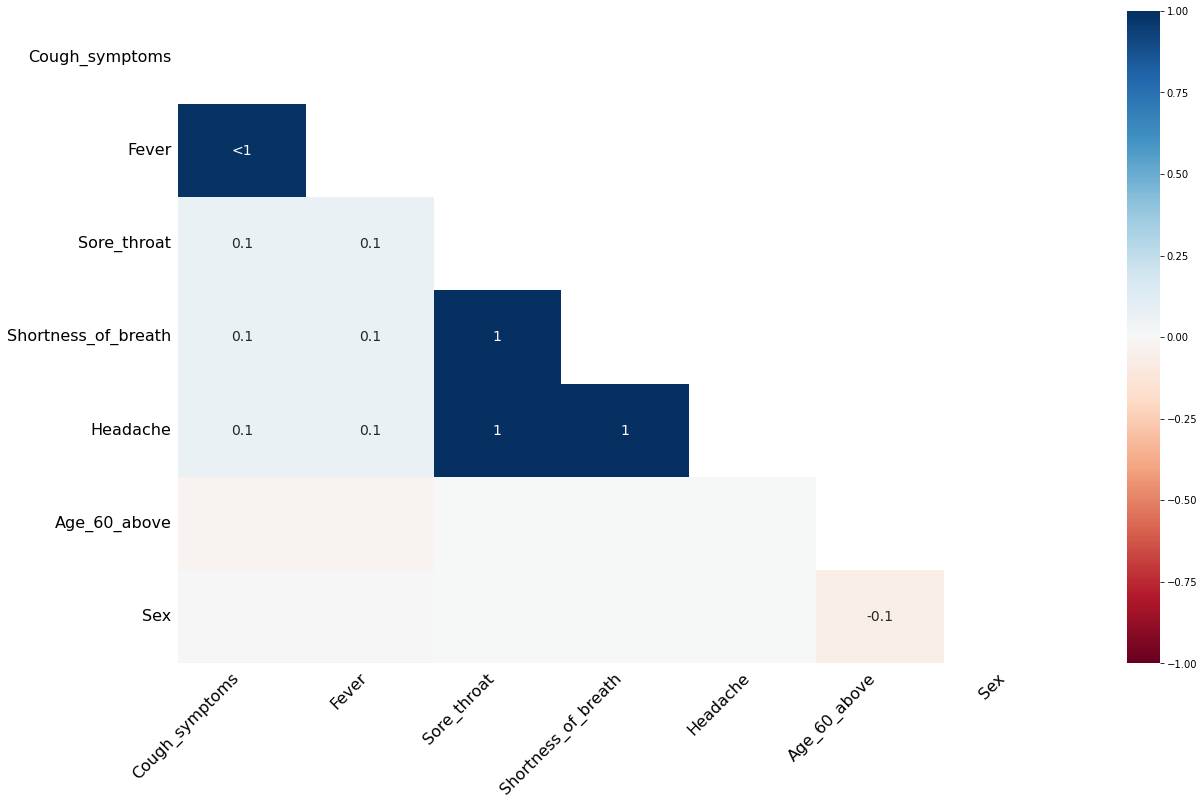

In [ ]:
msno.heatmap(Covid_19) # creating heatmap on correaltion

## EDA

Let's create some simple plots to check out the data!

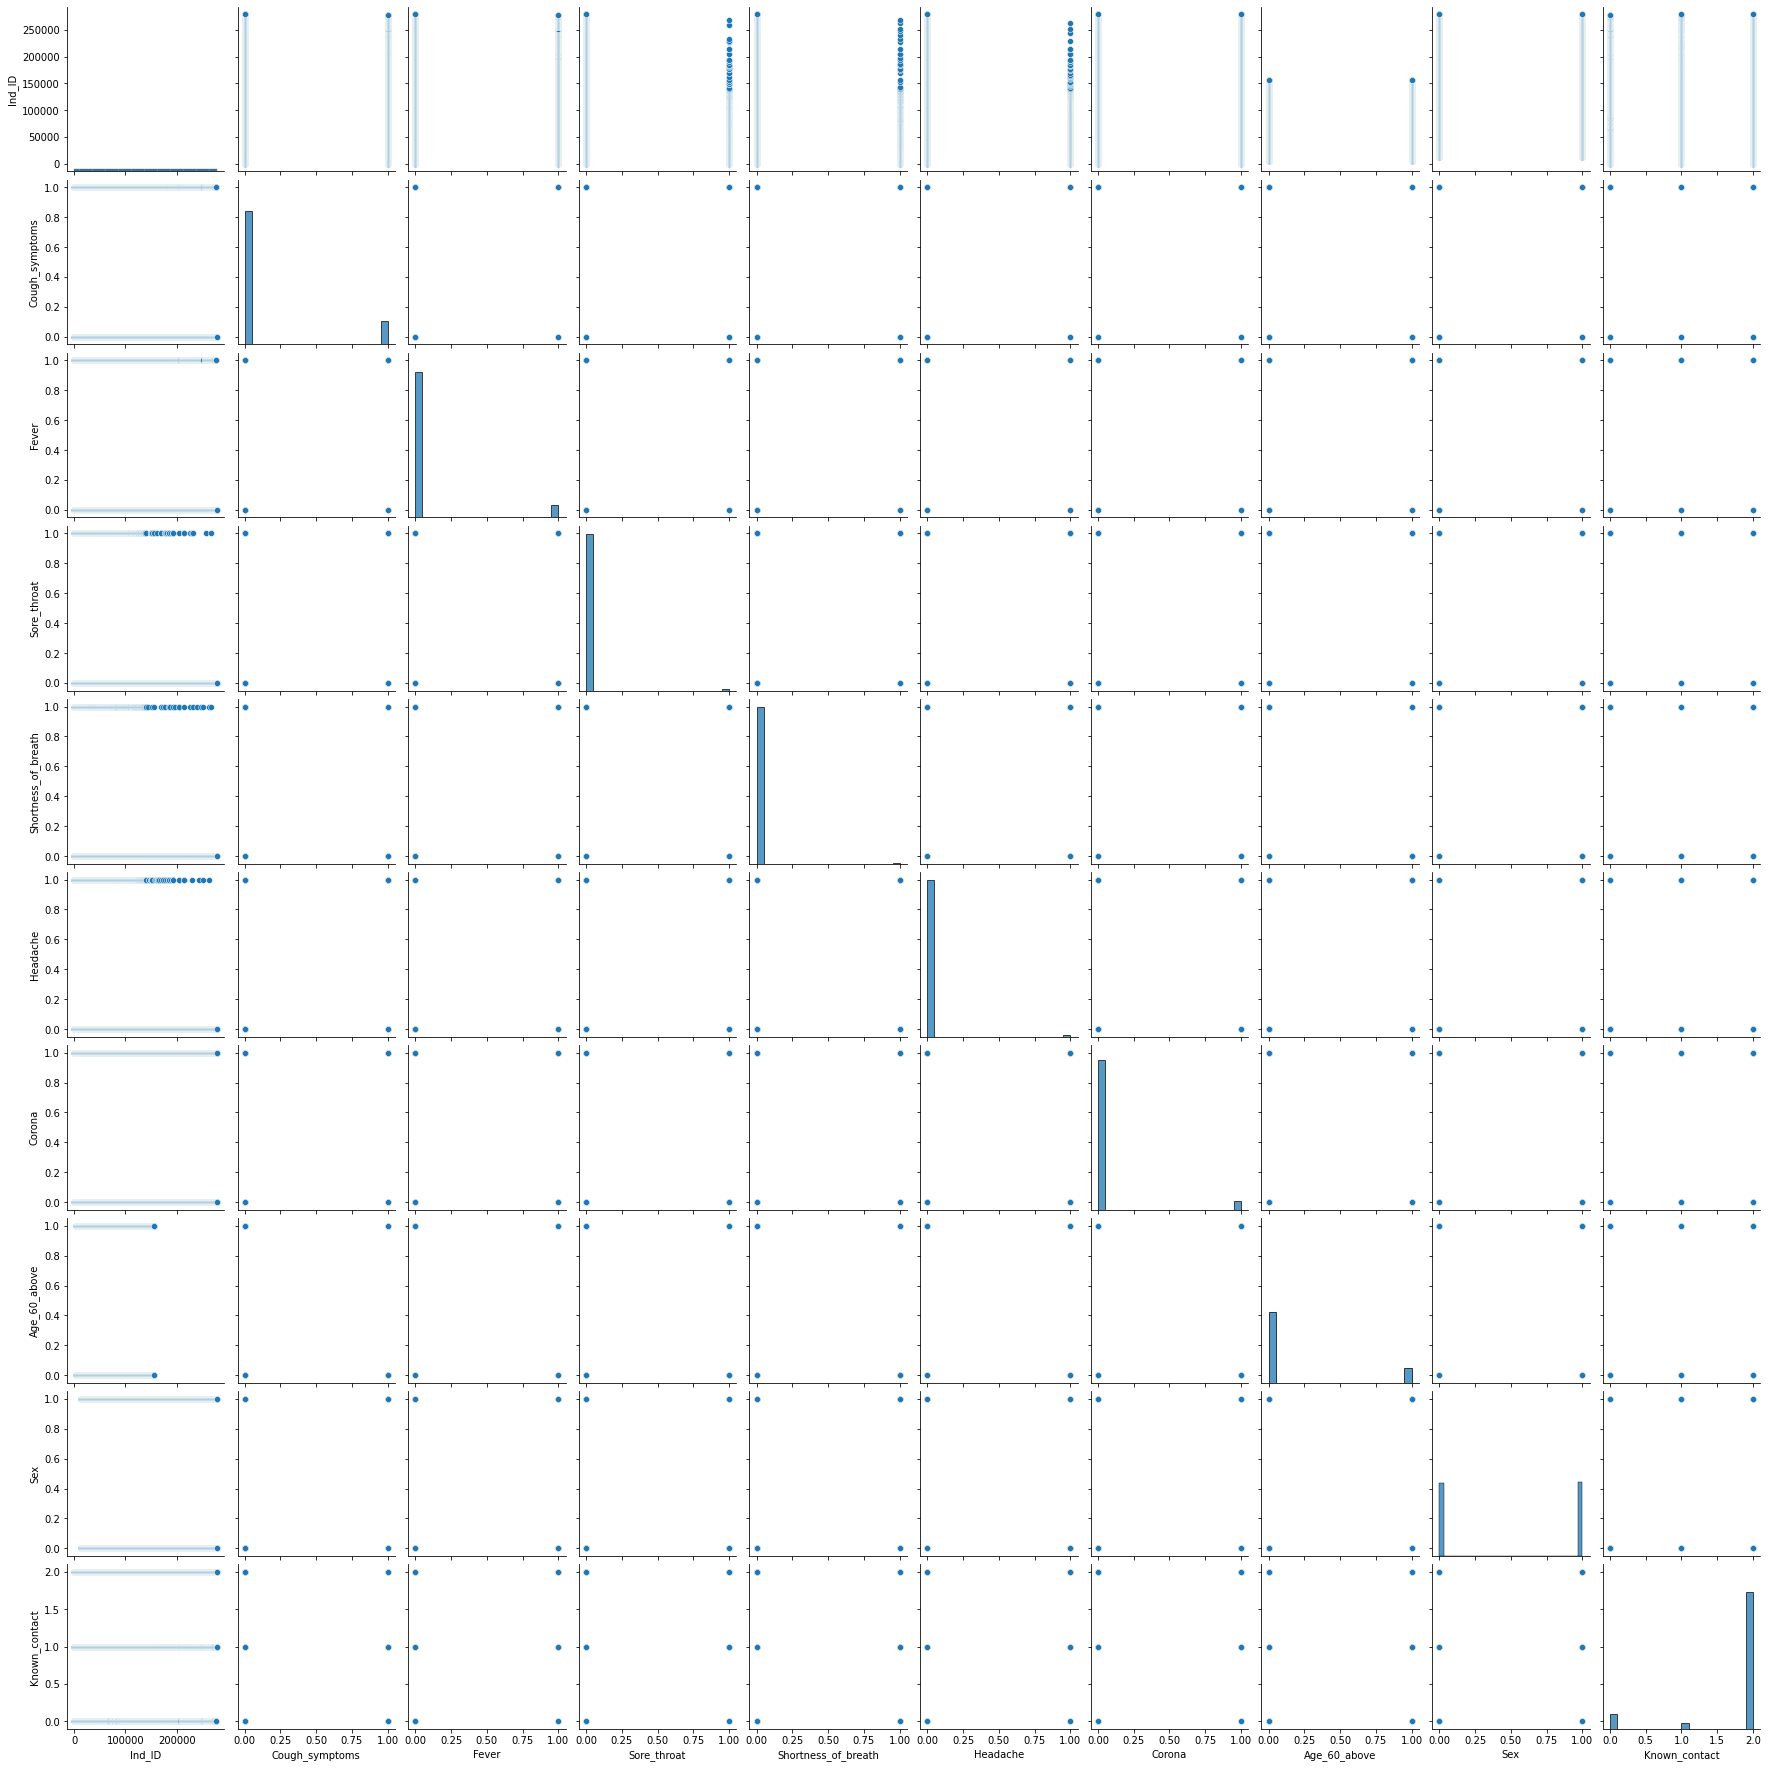

In [ ]:
sns.pairplot(Covid_19)

### **Examing Correlation value**

In [ ]:
# Examinig correlation value
# By default it will use pearson correlation. As all assumptions of pearson correlation is meeting, hence we are good to go with 
# pearson correlation, otherwise we should have used spearman correlation
# Correlation analysis cannot be used for categorical values.
Covid_19.corr()

Ind_ID  Cough_symptoms     Fever  Sore_throat  \
Ind_ID               1.000000       -0.053819 -0.052267    -0.086444   
Cough_symptoms      -0.053819        1.000000  0.454358     0.115808   
Fever               -0.052267        0.454358  1.000000     0.122948   
Sore_throat         -0.086444        0.115808  0.122948     1.000000   
Shortness_of_breath -0.087002        0.106891  0.126216     0.197540   
Headache            -0.091640        0.116485  0.169099     0.323132   
Corona              -0.115310        0.195072  0.264037     0.275728   
Age_60_above         0.079544       -0.038617  0.001080    -0.012769   
Sex                  0.008072       -0.030929 -0.036001     0.006109   
Known_contact        0.068096       -0.571269 -0.348801    -0.088384   

                     Shortness_of_breath  Headache    Corona  Age_60_above  \
Ind_ID                         -0.087002 -0.091640 -0.115310      0.079544   
Cough_symptoms                  0.106891  0.116485  0.195072     -0.038617   
Fever                           0.126216  0.169099  0.264037      0.001080   
Sore_throat                     0.197540  0.323132  0.275728     -0.012769   
Shortness_of_breath             1.000000  0.202538  0.231065      0.013934   
Headache                        0.202538  1.000000  0.364752     -0.015056   
Corona                          0.231065  0.364752  1.000000      0.016545   
Age_60_above                    0.013934 -0.015056  0.016545      1.000000   
Sex                            -0.004115 -0.001942 -0.026539      0.036216   
Known_contact                  -0.074013 -0.091381 -0.210068      0.057234   

                          Sex  Known_contact  
Ind_ID               0.008072       0.068096  
Cough_symptoms      -0.030929      -0.571269  
Fever               -0.036001      -0.348801  
Sore_throat          0.006109      -0.088384  
Shortness_of_breath -0.004115      -0.074013  
Headache            -0.001942      -0.091381  
Corona              -0.026539      -0.210068  
Age_60_above         0.036216       0.057234  
Sex                  1.000000       0.030028  
Known_contact        0.030028       1.000000

**Correlation Heatmap**

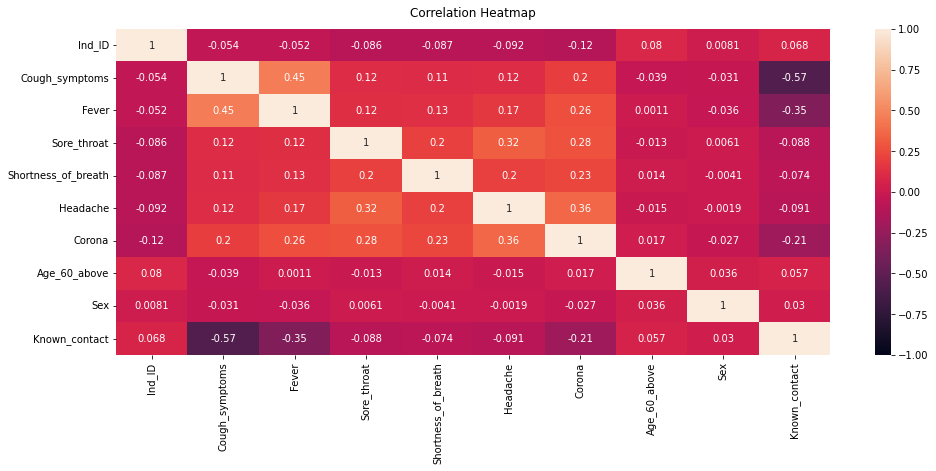

In [ ]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(Covid_19.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

# SimpleImputer to fill missing values

In [ ]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
imputer = imputer.fit(Covid_19.iloc[:, 2:3])
Covid_19.iloc[:, 2:3] = imputer.transform(Covid_19.iloc[:, 2:3])

In [ ]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
imputer = imputer.fit(Covid_19.iloc[:, 3:4])
Covid_19.iloc[:, 3:4] = imputer.transform(Covid_19.iloc[:, 3:4])

In [ ]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
imputer = imputer.fit(Covid_19.iloc[:, 4:5])
Covid_19.iloc[:, 4:5] = imputer.transform(Covid_19.iloc[:, 4:5])

In [ ]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
imputer = imputer.fit(Covid_19.iloc[:, 5:6])
Covid_19.iloc[:, 5:6] = imputer.transform(Covid_19.iloc[:, 5:6])

In [ ]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
imputer = imputer.fit(Covid_19.iloc[:, 6:7])
Covid_19.iloc[:, 6:7] = imputer.transform(Covid_19.iloc[:, 6:7])

In [ ]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
imputer = imputer.fit(Covid_19.iloc[:, 9:10])
Covid_19.iloc[:, 9:10] = imputer.transform(Covid_19.iloc[:, 9:10])

In [ ]:
Covid_19

Ind_ID   Test_date  Cough_symptoms  Fever  Sore_throat  \
0            1  11-03-2020             1.0    0.0          1.0   
1            2  11-03-2020             0.0    1.0          0.0   
2            3  11-03-2020             0.0    1.0          0.0   
3            4  11-03-2020             1.0    0.0          0.0   
4            5  11-03-2020             1.0    0.0          0.0   
...        ...         ...             ...    ...          ...   
278843  278844  30-04-2020             0.0    0.0          0.0   
278844  278845  30-04-2020             0.0    0.0          0.0   
278845  278846  30-04-2020             0.0    0.0          0.0   
278846  278847  30-04-2020             0.0    0.0          0.0   
278847  278848  30-04-2020             0.0    0.0          0.0   

        Shortness_of_breath  Headache  Corona  Age_60_above  Sex  \
0                       0.0       0.0       0           NaN  1.0   
1                       0.0       0.0       1           NaN  1.0   
2                       0.0       0.0       1           NaN  1.0   
3                       0.0       0.0       0           NaN  1.0   
4                       0.0       0.0       0           NaN  1.0   
...                     ...       ...     ...           ...  ...   
278843                  0.0       0.0       1           NaN  0.0   
278844                  0.0       0.0       0           NaN  1.0   
278845                  0.0       0.0       0           NaN  0.0   
278846                  0.0       0.0       0           NaN  0.0   
278847                  0.0       0.0       0           NaN  1.0   

        Known_contact  
0                   0  
1                   0  
2                   0  
3                   0  
4                   1  
...               ...  
278843              2  
278844              2  
278845              2  
278846              2  
278847              2  

[278848 rows x 11 columns]

In [ ]:
Covid_19.fillna('missing', inplace = True)

In [ ]:
Covid_19.isnull().sum()

Ind_ID                 0
Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
Known_contact          0
dtype: int64

From above we can see that there is no missing values in dataset. 

To fill the missing values I have used SimpleImputer technique with strategy 'most frequent' i.e, mode technique. 

Because as it is categorical data we can't use mean or median. 

And I have tried with KNN Imputer and MICE Imputer technique also but I didn't get proper result. 

So I have follow the SimpleImputer technique to fill the missing values

In [ ]:
Covid_19

Ind_ID   Test_date  Cough_symptoms  Fever  Sore_throat  \
0            1  11-03-2020             1.0    0.0          1.0   
1            2  11-03-2020             0.0    1.0          0.0   
2            3  11-03-2020             0.0    1.0          0.0   
3            4  11-03-2020             1.0    0.0          0.0   
4            5  11-03-2020             1.0    0.0          0.0   
...        ...         ...             ...    ...          ...   
278843  278844  30-04-2020             0.0    0.0          0.0   
278844  278845  30-04-2020             0.0    0.0          0.0   
278845  278846  30-04-2020             0.0    0.0          0.0   
278846  278847  30-04-2020             0.0    0.0          0.0   
278847  278848  30-04-2020             0.0    0.0          0.0   

        Shortness_of_breath  Headache  Corona Age_60_above  Sex  Known_contact  
0                       0.0       0.0       0      missing  1.0              0  
1                       0.0       0.0       1      missing  1.0              0  
2                       0.0       0.0       1      missing  1.0              0  
3                       0.0       0.0       0      missing  1.0              0  
4                       0.0       0.0       0      missing  1.0              1  
...                     ...       ...     ...          ...  ...            ...  
278843                  0.0       0.0       1      missing  0.0              2  
278844                  0.0       0.0       0      missing  1.0              2  
278845                  0.0       0.0       0      missing  0.0              2  
278846                  0.0       0.0       0      missing  0.0              2  
278847                  0.0       0.0       0      missing  1.0              2  

[278848 rows x 11 columns]

Saving cleaned dataset in the CSV format

In [ ]:
Covid_19.to_csv("Covid_19_cleaned.csv", index = False, header = True)

### **Visulaizing the dataset of symptoms and corona result by using count plot. As it is categorical data we can use count, bar, box plot to show the result.**

<function matplotlib.pyplot.show(close=None, block=None)>

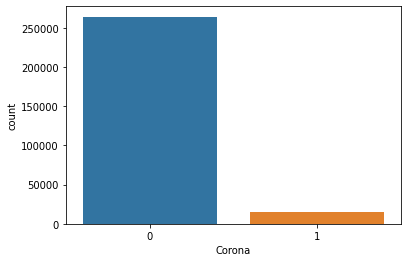

In [ ]:
sns.countplot(x = 'Corona', data = Covid_19)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

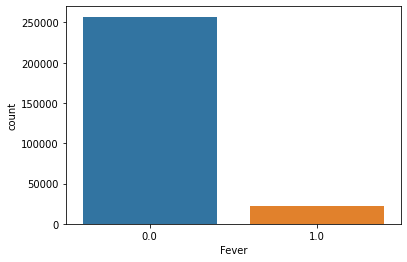

In [ ]:
sns.countplot(x = 'Fever', data = Covid_19)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

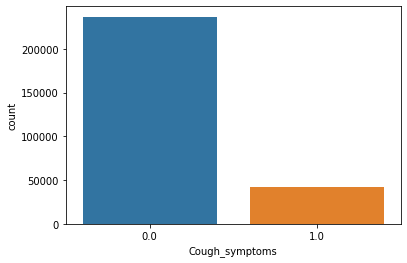

In [ ]:
sns.countplot(x = 'Cough_symptoms', data = Covid_19)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

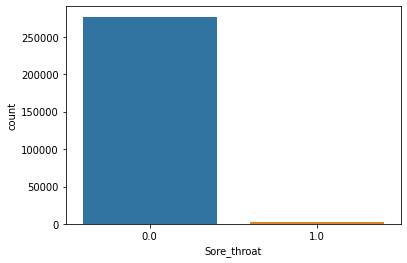

In [ ]:
sns.countplot(x = 'Sore_throat', data = Covid_19)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

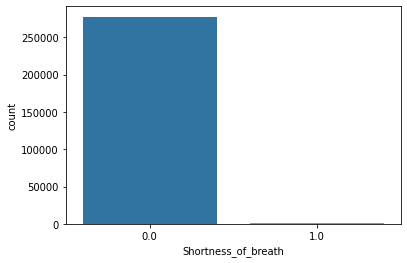

In [ ]:
sns.countplot(x = 'Shortness_of_breath', data = Covid_19)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

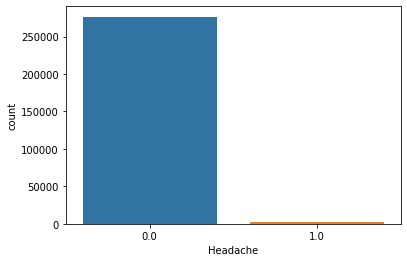

In [ ]:
sns.countplot(x = 'Headache', data = Covid_19)
plt.show

# Selecting Independent variables

In [ ]:
X = Covid_19.loc[:, ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache',]]
X

Cough_symptoms  Fever  Sore_throat  Shortness_of_breath  Headache
0                  1.0    0.0          1.0                  0.0       0.0
1                  0.0    1.0          0.0                  0.0       0.0
2                  0.0    1.0          0.0                  0.0       0.0
3                  1.0    0.0          0.0                  0.0       0.0
4                  1.0    0.0          0.0                  0.0       0.0
...                ...    ...          ...                  ...       ...
278843             0.0    0.0          0.0                  0.0       0.0
278844             0.0    0.0          0.0                  0.0       0.0
278845             0.0    0.0          0.0                  0.0       0.0
278846             0.0    0.0          0.0                  0.0       0.0
278847             0.0    0.0          0.0                  0.0       0.0

[278848 rows x 5 columns]

# Selecting Dependent variable

In [ ]:
y = Covid_19.loc[:, ['Corona']]
y

Corona
0            0
1            1
2            1
3            0
4            0
...        ...
278843       1
278844       0
278845       0
278846       0
278847       0

[278848 rows x 1 columns]

## Training a Linear Regression Model
First split the dataset into an X array containing symptoms and Y array (Corona) with the target varaible. And remaining information wil be removed as it does not contain important information to effect the model.


### X and y arrays

## Splitting the dataset into the Training set and Test set

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.40, random_state = 42)

In [ ]:
X_train

Cough_symptoms  Fever  Sore_throat  Shortness_of_breath  Headache
213932             0.0    0.0          0.0                  0.0       0.0
71421              0.0    0.0          0.0                  0.0       0.0
7315               0.0    0.0          0.0                  0.0       0.0
118461             0.0    0.0          0.0                  0.0       0.0
136398             0.0    0.0          0.0                  0.0       0.0
...                ...    ...          ...                  ...       ...
119879             1.0    0.0          0.0                  0.0       0.0
259178             1.0    0.0          0.0                  0.0       0.0
131932             0.0    0.0          0.0                  0.0       0.0
146867             0.0    0.0          0.0                  0.0       0.0
121958             1.0    0.0          0.0                  0.0       0.0

[167308 rows x 5 columns]

In [ ]:
y_train

Corona
213932       0
71421        1
7315         0
118461       0
136398       0
...        ...
119879       0
259178       0
131932       0
146867       0
121958       0

[167308 rows x 1 columns]

In [ ]:
X_test

Cough_symptoms  Fever  Sore_throat  Shortness_of_breath  Headache
1943               0.0    0.0          0.0                  0.0       0.0
50392              0.0    0.0          0.0                  0.0       0.0
179856             0.0    0.0          0.0                  0.0       0.0
161573             0.0    0.0          0.0                  0.0       0.0
167293             0.0    0.0          0.0                  0.0       0.0
...                ...    ...          ...                  ...       ...
268166             0.0    0.0          0.0                  0.0       0.0
3788               0.0    0.0          0.0                  0.0       0.0
24967              0.0    0.0          0.0                  0.0       0.0
50039              0.0    0.0          0.0                  0.0       0.0
78404              1.0    0.0          0.0                  0.0       0.0

[111540 rows x 5 columns]

In [ ]:
y_test

Corona
1943         0
50392        0
179856       0
161573       0
167293       0
...        ...
268166       0
3788         0
24967        0
50039        0
78404        0

[111540 rows x 1 columns]

## Again Splitting the dataset into Traing and Validation test

In [ ]:
X_train_new, X_val, y_train_new, y_val = train_test_split(X_train, y_train, test_size = 0.4, random_state = 42)

In [ ]:
X_train_new, X_val, X_test

(        Cough_symptoms  Fever  Sore_throat  Shortness_of_breath  Headache
 95101              0.0    0.0          0.0                  0.0       0.0
 93554              0.0    0.0          0.0                  0.0       0.0
 236610             0.0    0.0          0.0                  0.0       0.0
 18028              0.0    0.0          0.0                  0.0       0.0
 42134              0.0    0.0          0.0                  0.0       0.0
 ...                ...    ...          ...                  ...       ...
 153806             0.0    0.0          0.0                  0.0       0.0
 180532             1.0    1.0          0.0                  0.0       0.0
 262554             0.0    0.0          0.0                  0.0       0.0
 264687             0.0    0.0          0.0                  0.0       0.0
 194013             0.0    0.0          0.0                  0.0       0.0
 
 [100384 rows x 5 columns],
         Cough_symptoms  Fever  Sore_throat  Shortness_of_breath  Head

### Feature scaling
- Perform to create same scale for all variables.
- Hence, all variables will have similar influnece on the model

#### Standardization
$X = \frac{Xi - {X}_{mean}} {SD}$

In [ ]:
#feature scaling
from sklearn.preprocessing import StandardScaler    
scaler=StandardScaler()
scaler

### using fit_transform to Standardize the train data
X_train=scaler.fit_transform(X_train)
X_train

X_test=scaler.transform(X_test)
X_test

array([[-0.42200037, -0.28991444, -0.08344786, -0.07488534, -0.09366338],
       [-0.42200037, -0.28991444, -0.08344786, -0.07488534, -0.09366338],
       [-0.42200037, -0.28991444, -0.08344786, -0.07488534, -0.09366338],
       ...,
       [-0.42200037, -0.28991444, -0.08344786, -0.07488534, -0.09366338],
       [-0.42200037, -0.28991444, -0.08344786, -0.07488534, -0.09366338],
       [ 2.36966616, -0.28991444, -0.08344786, -0.07488534, -0.09366338]])

## Creating and Training the Model

# **Cost Function**

In [ ]:
# importing cost function libraries
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

# **Linear Regression**

In [ ]:
lm = LinearRegression()
lm.fit(X_train,y_train)
# regression coefficients
print('Coefficients: ', lm.coef_)

Coefficients:  [[0.01436369 0.03522167 0.03137424 0.02829619 0.05875986]]


In [ ]:
y_pred = lm.predict(X_train)
y_pred

array([[0.0264786 ],
       [0.0264786 ],
       [0.0264786 ],
       ...,
       [0.0264786 ],
       [0.0264786 ],
       [0.06657724]])

In [ ]:
r2 = r2_score(y_true=y_train,y_pred=y_pred)
print(r2)

0.21637613674733025


In [ ]:
# calculting adjusted rsquared value
N=X.shape[0]
p=5
x = (1-r2)
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))
print("Adjusted-R2 : " , adj_rsquared)

Adjusted-R2 :  0.21636208535149937


In [ ]:
# Checking mean value for residuala
residuals = y_train.values-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -1.1572841435832555e-18


### Errors should be normally distributed

<Axes: ylabel='Density'>

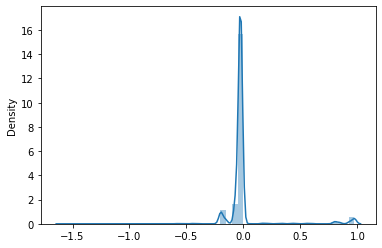

In [ ]:
# checking if errors are normally distributed are not
sns.distplot((y_train-y_pred),bins=50)

## Predictions from our Model

Let's grab predictions off our test set and see how well it did!

In [ ]:
predictions = lm.predict(X_test) # predicting test set
predictions

array([[0.0264786 ],
       [0.0264786 ],
       [0.0264786 ],
       ...,
       [0.0264786 ],
       [0.0264786 ],
       [0.06657724]])

In [ ]:
y_test.head()

Corona
1943         0
50392        0
179856       0
161573       0
167293       0

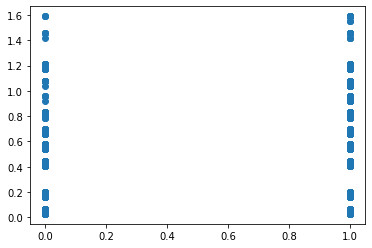

In [ ]:
# scatter plot between actaul and predicted value 
plt.scatter(y_test,predictions)

In [ ]:
# Calculating error
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.07965187122948639
MSE: 0.03904353563384959
RMSE: 0.19759437146297865


# **Machine Learning Models**

# Random Forest Regressor

In [ ]:
# Importing library
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(X_train, y_train) 

RandomForestRegressor(random_state=0)

**Using Above Model to get prediction for test data**

In [ ]:
# performing prediction
y_pred = regressor.predict(X_test)
y_pred

array([0.02319585, 0.02319585, 0.02319585, ..., 0.02319585, 0.02319585,
       0.08471131])

<Axes: ylabel='Density'>

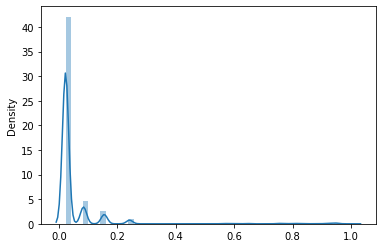

In [ ]:
sns.distplot(y_pred)

In [ ]:
# calculating error
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.07598673239584774
MSE: 0.037856306270092545
RMSE: 0.1945669711695501


# Logistic Regression

In [ ]:
import pandas as pd 
import numpy as np

### Visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [ ]:
### Creating a Logistic regression object
logistic_reg=LogisticRegression(random_state = 0)

In [ ]:
### Passing independant and dependant training data to the model
logistic_reg.fit(X_train,y_train)

LogisticRegression(random_state=0)

**Using Above Model to get prediction for test data**

In [ ]:
logistic_reg_pred=logistic_reg.predict(X_test)
logistic_reg_pred

array([0, 0, 0, ..., 0, 0, 0])

<Axes: ylabel='Density'>

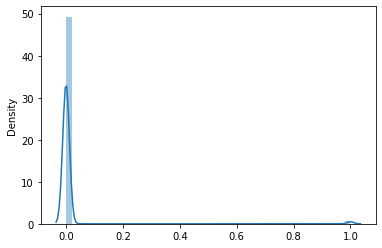

In [ ]:
sns.distplot(logistic_reg_pred)

# Performance Metrics

# Confusion Matrix

In [ ]:
confusion_mat=confusion_matrix(y_test, logistic_reg_pred)
confusion_mat

array([[105417,    260],
       [  4491,   1372]])

<Axes: ylabel='Density'>

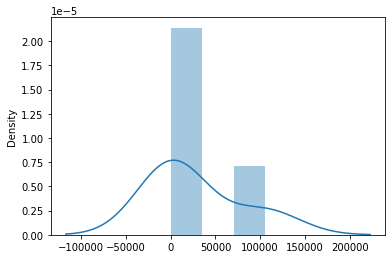

In [ ]:
sns.distplot(confusion_mat)

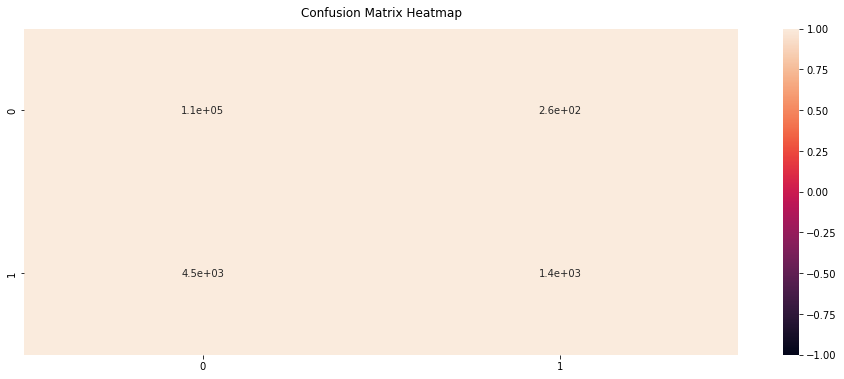

In [ ]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(confusion_mat, vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Confusion Matrix Heatmap', fontdict={'fontsize':12}, pad=12);

# Accuracy Score

In [ ]:
### accuracy using accuracy_score
print(round(accuracy_score(y_test, logistic_reg_pred), 2))

0.96


# Precision Score

In [ ]:
print(round(precision_score(y_test, logistic_reg_pred), 2))

0.84


# Recall Score

In [ ]:
print(round(recall_score(y_test, logistic_reg_pred), 2))

0.23


# F1 Score

In [ ]:
from sklearn.metrics import f1_score
print(round(f1_score(y_test, logistic_reg_pred), 2))

0.37


In [ ]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, logistic_reg_pred)
auc

0.6157747826614787

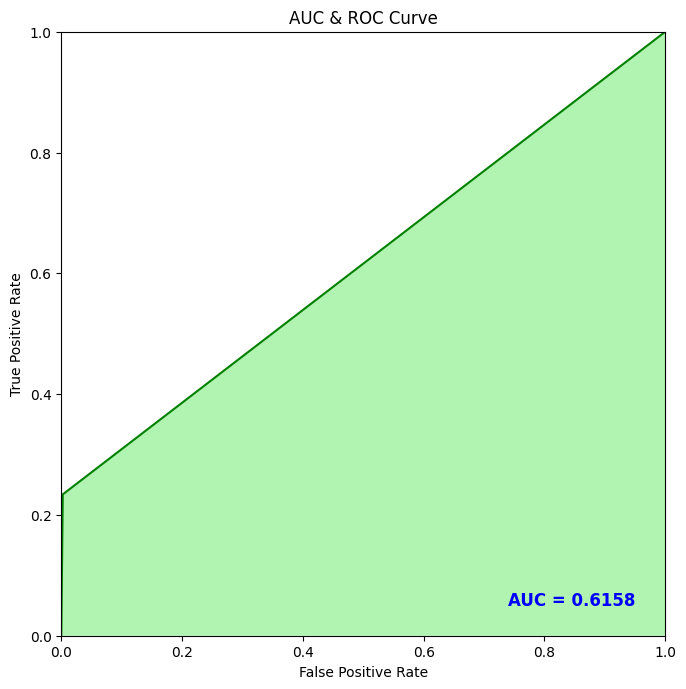

In [ ]:
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, logistic_reg_pred)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [ ]:
from sklearn.metrics import log_loss
logloss = log_loss(y_test, logistic_reg.predict_proba(X_test))
logloss

0.15992642357079326

# K-Nearest Neighbor(KNN) Algorithm

In [ ]:
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)  
classifier.fit(X_train, y_train) 

KNeighborsClassifier()

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(X_test)  

In [ ]:
confusion_mat1=confusion_matrix(y_test, y_pred)
confusion_mat1

array([[105367,    310],
       [  4406,   1457]])

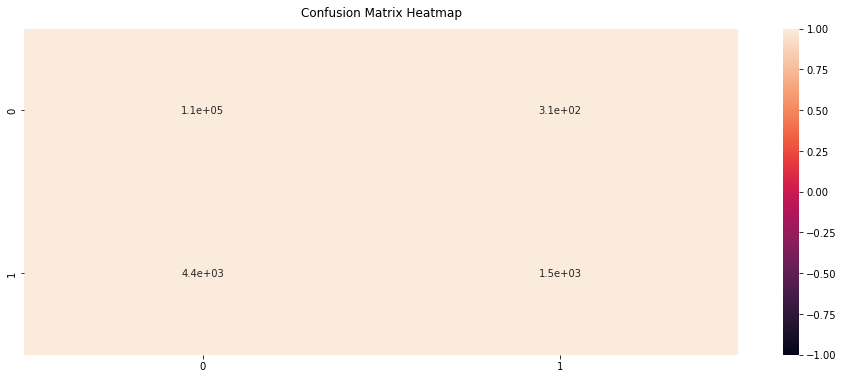

In [ ]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(confusion_mat1, vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Confusion Matrix Heatmap', fontdict={'fontsize':12}, pad=12);

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

<Axes: ylabel='Density'>

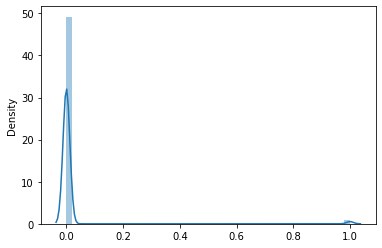

In [ ]:
sns.distplot(y_pred)

In [ ]:
#Creating the Confusion matrix  , accuracy score and classification report.
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [ ]:
cm= confusion_matrix(y_test, y_pred) 
print(cm)
score=accuracy_score(y_test, y_pred)
print(score)

[[105367    310]
 [  4406   1457]]
0.95771920387305


# Support Vector Machine(SVM)

In [ ]:
# Importing SVR library and creating model
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

SVR()

In [ ]:
y_pred = regressor.predict(X_test) # prediciting y

<Axes: ylabel='Density'>

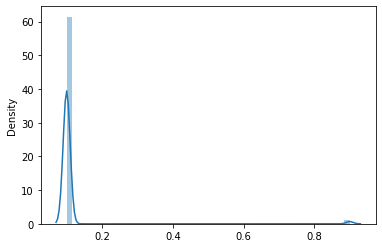

In [ ]:
sns.distplot(y_pred)

In [ ]:
# Calculating error
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.13368936829120376
MSE: 0.04368193058019687
RMSE: 0.2090022262565566


MAE: 0.13368936829120376
MSE: 0.04368193058019687


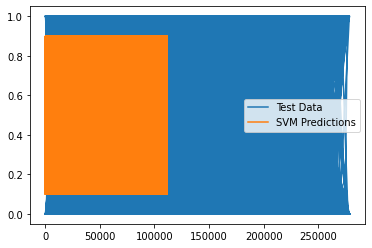

In [ ]:
svm_test_pred = regressor.predict(X_test)
plt.plot(y_test)
plt.plot(svm_test_pred)
plt.legend(['Test Data', 'SVM Predictions'])
print('MAE:', metrics.mean_absolute_error(y_pred, y_test))
print('MSE:',metrics.mean_squared_error(y_pred, y_test))

### Conclusion
Here, we performed 4 different models i.e, Randomforest regressor, Logistic regression, KNN-clasifier and Support vector machine to check which model seems to give a better accuracy or least error. 

Overall, Weighted average of F1 score, precision and recall is used 
to compare the models since the dataset was 
imbalanced. 

From the above summary, it can be concluded 
that the model with highest 
accuracy on the survey dataset is random forest 
classification. 

Logistic Regression also performs quite well 
on both the test datasets.


Random forest is less prone to overfitting.

 Therefore, the 
model chosen to predict results on the corona predictions 
was random forest classifier since it gives better accuracy 
on the individuals tested here and hence predicts results 
faster.

**Note**: This a basic model using correct approach. We can still perform more models, parameter optimization and cross validation to identify the best model for the project.